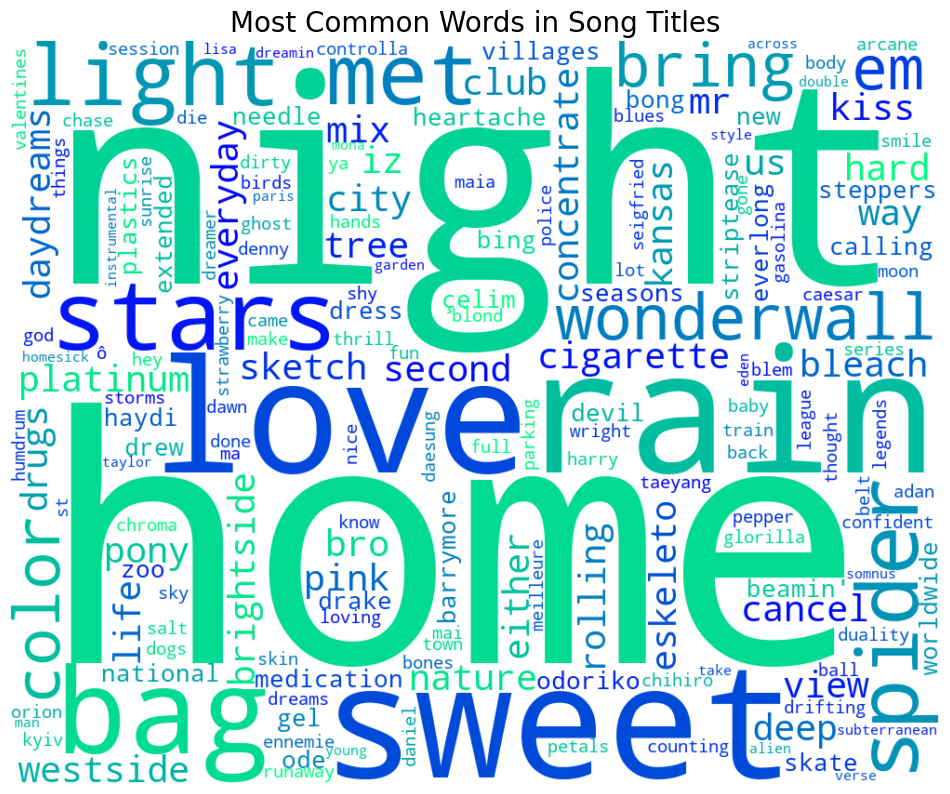

In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ds4200_spotify_data.csv')
words = data['track_name'].dropna().str.split(expand=True).stack().reset_index(drop=True)
words = words.str.lower()

custom_stopwords = set(STOPWORDS).union({
    'the', 'a', "it's", 'and', 'of', 'in', 'to', 'for', 'is', 'it',
    'you', 'that', 'with', 'on', 'as', 'this', 'by', 'at',
    'be', 'from', 'not', 'or', 'but', 'all', 'any', 'so',
    'if', 'my', 'your', 'we', 'me', 'they', 'her', 'his',
    'feat', 'featuring', '-', '(', ')', 'version', 'edit', 'remix', '(feat.', 'remaster', 'remastered','ok'
})

filtered_words = words[~words.isin(custom_stopwords)]

text = " ".join(filtered_words)

wc = WordCloud(
    width=1000,
    height=800,
    background_color='white',
    colormap='winter',
    stopwords=custom_stopwords
).generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Song Titles", fontsize=20)
plt.show()